# Prepare yearly crimes count datasets by location (lat/lon) for each zip code

Note: crimes in 2016 is not a full year of data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
crimes = pd.read_csv('nyc_crime_violent_with_zip.csv')

In [3]:
crimes.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_TO_DT,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,BORO_NM,LAT_TRIM,LON_TRIM,LATITUDE,LONGITUDE,Zip Code
0,112096415,2015-10-16,2015-10-16,2015-10-16,125,NYS LAWS-UNCLASSIFIED FELONY,COMPLETED,STATEN ISLAND,40.5709,-74.1698,40.570888,-74.169836,10314
1,534515735,2013-04-12,2013-04-12,2013-04-12,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,STATEN ISLAND,40.5709,-74.1698,40.570888,-74.169836,10314
2,450719401,2013-11-10,2013-11-10,2013-11-10,105,ROBBERY,COMPLETED,STATEN ISLAND,40.5709,-74.1698,40.570888,-74.169836,10314
3,885775104,2014-06-28,2014-06-28,2014-06-29,105,ROBBERY,COMPLETED,STATEN ISLAND,40.5709,-74.1698,40.570888,-74.169836,10314
4,919218176,2013-03-28,2013-03-29,2013-03-29,109,GRAND LARCENY,COMPLETED,STATEN ISLAND,40.5709,-74.1698,40.570888,-74.169836,10314


In [4]:
crimes.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_TO_DT', 'RPT_DT', 'KY_CD',
       'OFNS_DESC', 'CRM_ATPT_CPTD_CD', 'BORO_NM', 'LAT_TRIM', 'LON_TRIM',
       'LATITUDE', 'LONGITUDE', 'Zip Code'],
      dtype='object')

## Clean up and reduce size of dataset

In [5]:
remove_list = ['CMPLNT_NUM', 'CMPLNT_TO_DT', 'RPT_DT', 'KY_CD',
       'OFNS_DESC', 'CRM_ATPT_CPTD_CD', 'BORO_NM',
       'LATITUDE', 'LONGITUDE']

for remove in remove_list:
    crimes.drop(remove, axis=1, inplace=True)
    
crimes.columns

Index(['CMPLNT_FR_DT', 'LAT_TRIM', 'LON_TRIM', 'Zip Code'], dtype='object')

In [6]:
crimes = crimes[crimes.CMPLNT_FR_DT.notnull()]

In [7]:
# Note: pd.to_datetime(crimes['CMPLNT_FR_DT']) does not work since some weird date like year before 1100!

first4 = lambda x: int(str(x)[:4])
crimes['YEAR'] = crimes.CMPLNT_FR_DT.map(first4)

In [8]:
crimes = crimes[crimes.YEAR >= 2006]

In [9]:
crimes.groupby('YEAR').YEAR.count()

YEAR
2006    220490
2007    218119
2008    215580
2009    206346
2010    207505
2011    206081
2012    208842
2013    201742
2014    196272
2015    191346
2016    184287
Name: YEAR, dtype: int64

In [10]:
crimes.drop('CMPLNT_FR_DT', axis=1, inplace=True)
crimes.columns

Index(['LAT_TRIM', 'LON_TRIM', 'Zip Code', 'YEAR'], dtype='object')

## Test grouping by lat/lon and zip codes for each year

In [29]:
crimes[(crimes['Zip Code']== 11206) & (crimes['LAT_TRIM'] == 40.6926) & (crimes['LON_TRIM'] == -73.9472) & 
       (crimes['YEAR'] == 2010)]

,LAT_TRIM,LON_TRIM,Zip Code,YEAR
1505610,40.6926,-73.9472,11206,2010
1505616,40.6926,-73.9472,11206,2010
1505618,40.6926,-73.9472,11206,2010
1505624,40.6926,-73.9472,11206,2010
1505634,40.6926,-73.9472,11206,2010
1505640,40.6926,-73.9472,11206,2010
1505644,40.6926,-73.9472,11206,2010
1505652,40.6926,-73.9472,11206,2010
1505654,40.6926,-73.9472,11206,2010
1505656,40.6926,-73.9472,11206,2010


In [31]:
test = crimes[crimes.YEAR == 2010].groupby(['LAT_TRIM', 'LON_TRIM', 'Zip Code'])['YEAR'].count().reset_index()
test.rename(columns={'YEAR': 'crime_count'}, inplace=True)
test[test['Zip Code'] == 11206].head()

,LAT_TRIM,LON_TRIM,Zip Code,crime_count
22001,40.6921,-73.9486,11206,2
22065,40.6923,-73.9503,11206,9
22095,40.6924,-73.9428,11206,2
22146,40.6926,-73.9472,11206,12
22174,40.6927,-73.9400,11206,11


## Create datasets by year and save in csv files for R Shiny

In [20]:
years = []

for y in range(2006, 2017, 1):
    years.append(y)


In [33]:
for y in years:
    crimes_y = crimes[crimes.YEAR == y].groupby(['LAT_TRIM', 'LON_TRIM', 'Zip Code'])['YEAR'].count().reset_index()
    crimes_y.rename(columns={'YEAR': 'crime_count'}, inplace=True)
    filename = 'crimes_'+ str(y) +".csv"
    crimes_y.to_csv(filename, index=False)

## Max lat and lon for each zip codes (2006 and 2015 only)

In [12]:
crimesubset = crimes[(crimes['YEAR'] == 2006) | (crimes['YEAR'] == 2015)]
test = crimesubset.groupby(['LAT_TRIM', 'LON_TRIM', 'Zip Code'])['YEAR'].count().reset_index()
test.head()

,LAT_TRIM,LON_TRIM,Zip Code,YEAR
0,40.4988,-74.2405,10307,1
1,40.4989,-74.2415,10307,1
2,40.4990,-74.2444,10307,2
3,40.4991,-74.2435,10307,1
4,40.4992,-74.2431,10307,1


In [13]:
maxlat = test.groupby('Zip Code').LAT_TRIM.max().reset_index()
maxlat.head()

,Zip Code,LAT_TRIM
0,7030,40.7173
1,7306,40.6899
2,7307,40.7095
3,7648,40.9114
4,10001,40.8245


In [14]:
maxlon = test.groupby('Zip Code').LON_TRIM.max().reset_index()
maxlon.head()

,Zip Code,LON_TRIM
0,7030,-73.9657
1,7306,-73.9804
2,7307,-73.9848
3,7648,-73.8966
4,10001,-73.9369


In [15]:
maxlatlon = pd.merge(maxlat, maxlon, on="Zip Code")
maxlatlon.head()

,Zip Code,LAT_TRIM,LON_TRIM
0,7030,40.7173,-73.9657
1,7306,40.6899,-73.9804
2,7307,40.7095,-73.9848
3,7648,40.9114,-73.8966
4,10001,40.8245,-73.9369


In [16]:
maxlatlon[maxlatlon['Zip Code'] == 11201]

,Zip Code,LAT_TRIM,LON_TRIM
128,11201,40.7098,-73.9754


In [17]:
minlat = test.groupby('Zip Code').LAT_TRIM.min().reset_index()
minlon = test.groupby('Zip Code').LON_TRIM.min().reset_index()
minlatlon = pd.merge(minlat, minlon, on="Zip Code")

In [18]:
minmaxlatlon = pd.merge(maxlatlon, minlatlon, on="Zip Code")

minmaxlatlon.rename(columns={'LAT_TRIM_x':'maxlat', 'LON_TRIM_x':'maxlon', 
                             'LAT_TRIM_y': 'minlat', 'LON_TRIM_y':'minlon'},
                   inplace=True)

minmaxlatlon[minmaxlatlon['Zip Code'] == 11201]

,Zip Code,maxlat,maxlon,minlat,minlon
128,11201,40.7098,-73.9754,40.6769,-74.0006


In [19]:
minmaxlatlon.to_csv("minmaxlatlon.csv", index=False)

## Max lat and lon for each zip codes from 2006 to 2016

In [20]:
test = crimes.groupby(['LAT_TRIM', 'LON_TRIM', 'Zip Code'])['YEAR'].count().reset_index()
test.head()

,LAT_TRIM,LON_TRIM,Zip Code,YEAR
0,40.4988,-74.2405,10307,4
1,40.4989,-74.2415,10307,6
2,40.4990,-74.2444,10307,4
3,40.4991,-74.2435,10307,3
4,40.4992,-74.2431,10307,3


In [21]:
maxlat = test.groupby('Zip Code').LAT_TRIM.max().reset_index()
maxlat.head()

,Zip Code,LAT_TRIM
0,7030,40.7175
1,7305,40.6843
2,7306,40.6899
3,7307,40.7201
4,7648,40.9114


In [22]:
maxlon = test.groupby('Zip Code').LON_TRIM.max().reset_index()
maxlon.head()

,Zip Code,LON_TRIM
0,7030,-73.9655
1,7305,-73.9671
2,7306,-73.9804
3,7307,-73.9848
4,7648,-73.8966


In [23]:
maxlatlon = pd.merge(maxlat, maxlon, on="Zip Code")
maxlatlon.head()

,Zip Code,LAT_TRIM,LON_TRIM
0,7030,40.7175,-73.9655
1,7305,40.6843,-73.9671
2,7306,40.6899,-73.9804
3,7307,40.7201,-73.9848
4,7648,40.9114,-73.8966


In [24]:
maxlatlon[maxlatlon['Zip Code'] == 11201]

,Zip Code,LAT_TRIM,LON_TRIM
133,11201,40.7098,-73.953


In [25]:
minlat = test.groupby('Zip Code').LAT_TRIM.min().reset_index()
minlon = test.groupby('Zip Code').LON_TRIM.min().reset_index()
minlatlon = pd.merge(minlat, minlon, on="Zip Code")

In [26]:
minmaxlatlon = pd.merge(maxlatlon, minlatlon, on="Zip Code")

minmaxlatlon.rename(columns={'LAT_TRIM_x':'maxlat', 'LON_TRIM_x':'maxlon', 
                             'LAT_TRIM_y': 'minlat', 'LON_TRIM_y':'minlon'},
                   inplace=True)

minmaxlatlon[minmaxlatlon['Zip Code'] == 11201]

,Zip Code,maxlat,maxlon,minlat,minlon
133,11201,40.7098,-73.953,40.6769,-74.0014


In [27]:
minmaxlatlon.to_csv("minmaxlatlonAllYears.csv", index=False)

## Test mapping with one yearly dataset

In [34]:
c2010 = pd.read_csv("crimes_2010.csv")
c2010.head()

,LAT_TRIM,LON_TRIM,Zip Code,crime_count
0,40.4989,-74.2415,10307,2
1,40.4990,-74.2444,10307,1
2,40.4997,-74.2408,10307,2
3,40.4999,-74.2399,10307,1
4,40.5015,-74.2385,10307,2


In [62]:
minmaxlatlon = pd.read_csv("minmaxlatlon.csv")
minmaxlatlon.head()

,Zip Code,maxlat,maxlon,minlat,minlon
0,7030,40.7175,-73.9655,40.6770,-73.9955
1,7305,40.6843,-73.9671,40.6843,-73.9671
2,7306,40.6899,-73.9804,40.6899,-73.9809
3,7307,40.7201,-73.9848,40.7006,-74.0057
4,7648,40.9114,-73.8966,40.9114,-73.8966


In [69]:
minmaxlatlon[minmaxlatlon['Zip Code'] == 11201].minlat.values[0]

40.676900000000003

In [70]:
# Example: zip code 11201

c2010 = c2010[c2010['Zip Code'] == 11201]

gt10color = lambda x: 'red' if x >= 10 else 'grey'
c2010['color'] = c2010['crime_count'].map(gt10color)

ymin = minmaxlatlon[minmaxlatlon['Zip Code'] == 11201].minlat.values[0]
ymax = minmaxlatlon[minmaxlatlon['Zip Code'] == 11201].maxlat.values[0]
xmin = minmaxlatlon[minmaxlatlon['Zip Code'] == 11201].minlon.values[0]
xmax = minmaxlatlon[minmaxlatlon['Zip Code'] == 11201].maxlon.values[0]

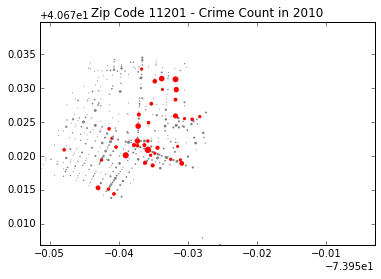

In [71]:
plt.scatter(c2010.LON_TRIM, c2010.LAT_TRIM, s=c2010['crime_count'], facecolor=c2010.color, lw = 0)
plt.title("Zip Code 11201 - Crime Count in 2010")
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

plt.show()